## Visualize unif prior for Lmin < Lmax

\Delta(n):  10
Sum of differences between ϕ_ and ϕ_2:  1.2784810126582273
Sum of differences between ϕ_ and ϕ_2:  2.7887979057022165
Sum of differences between ϕ_ and ϕ_2:  5.576933450523828


/var/folders/kh/5q2qjwdd4sz5cvjt10c51cgh0000gn/T/ipykernel_30566/214960638.py:34: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/kh/5q2qjwdd4sz5cvjt10c51cgh0000gn/T/ipykernel_30566/214960638.py:54: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


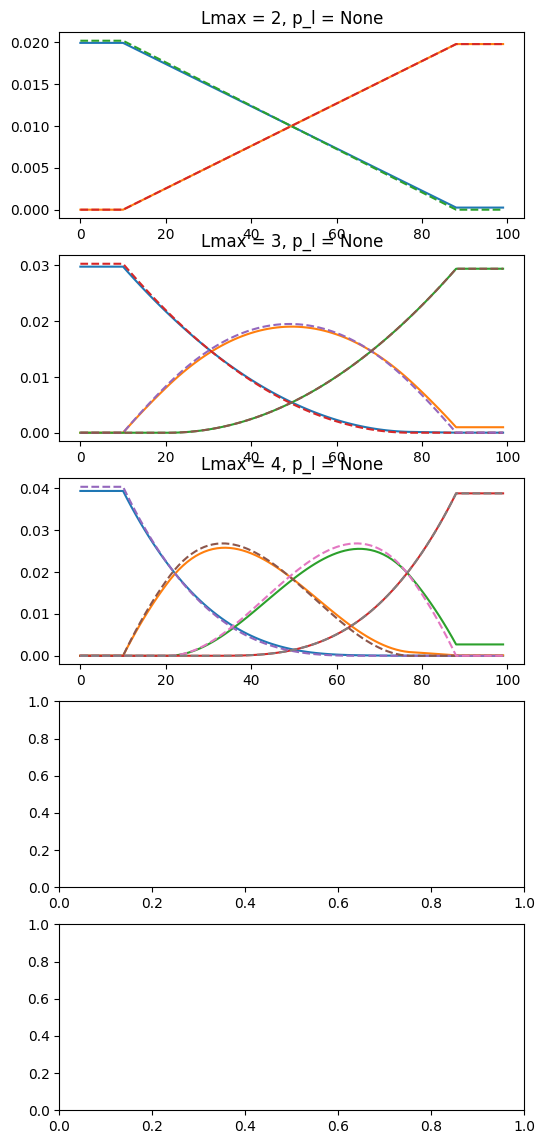

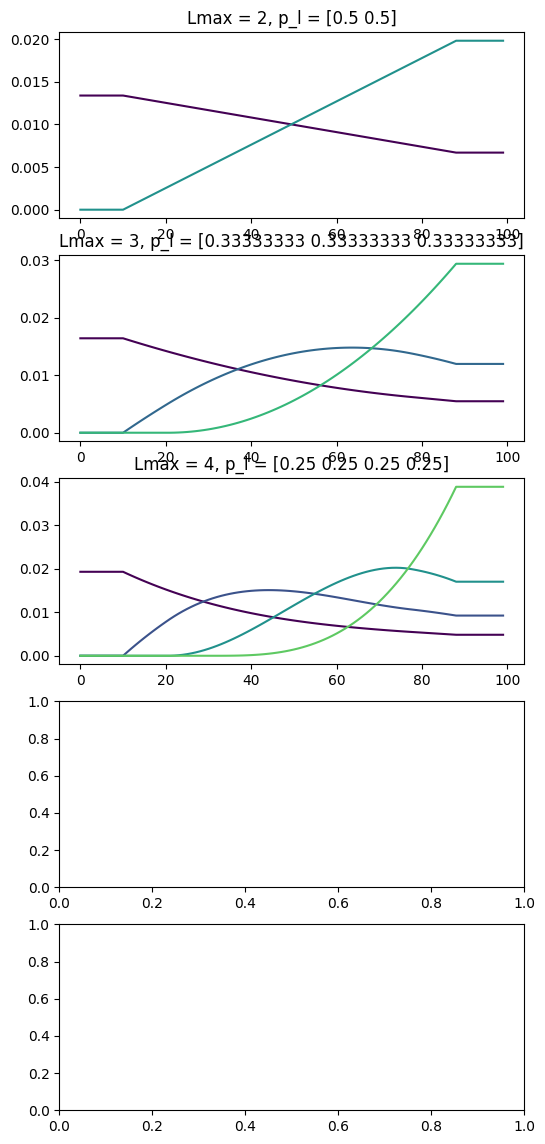

In [5]:
from amp.signal_configuration import unif_prior_to_η_ϕ
from matplotlib import pyplot as plt
import numpy as np


n_ = 100

Δ_ = lambda n_: int(n_/10)
print("\Delta(n): ", Δ_(n_))

# Iterate over Lmax_ and make each one a subplot
Lmin_ = 1
Lmax_cap = 5
fig, axs = plt.subplots(Lmax_cap, 1, figsize=(6, 14))
for Lmax_ in range(2, Lmax_cap):
    # p_l = 1/Lmax_ * np.ones(Lmax_) # puts equal weight on all number of signals, set None otherwise. Best for estimating size. 
    p_l = None
    a_, η_arr_, p_η_arr_, ϕ_ = unif_prior_to_η_ϕ(Lmin_, Lmax_, Δ_(n_), n_, p_l = p_l) # Lxn matrix

    _, _, _, ϕ_2 = unif_prior_to_η_ϕ(Lmax_, Lmax_, Δ_(n_), n_, p_l = p_l) # Lxn matrix

    assert (not np.all(ϕ_ == ϕ_2)), Lmax_
    print("Sum of differences between ϕ_ and ϕ_2: ", np.sum(np.abs(ϕ_ - ϕ_2)))

    # Normalize all rows of ϕ_ to sum to 1
    ϕ_normalized = ϕ_ / ϕ_.sum(axis = 1)[:, None]
    ϕ_normalized_2 = ϕ_2 / ϕ_2.sum(axis = 1)[:, None]

    axs[Lmax_-2].plot(ϕ_normalized.T)
    axs[Lmax_-2].plot(ϕ_normalized_2.T, linestyle = "--")
    axs[Lmax_-2].set_title(f"Lmax = {Lmax_}, p_l = {p_l}")

# fig.savefig("figures/marginal_display.pdf")
fig.show()

# Iterate over Lmax_ and make each one a subplot
Lmin_ = 1
fig, axs = plt.subplots(Lmax_cap, 1, figsize=(6, 14))
for Lmax_ in range(2, Lmax_cap):
    p_l = 1/Lmax_ * np.ones(Lmax_) # puts equal weight on all number of signals, set None otherwise. Best for estimating size. 
    # p_l = None
    a_, η_arr_, p_η_arr_, ϕ_ = unif_prior_to_η_ϕ(Lmin_, Lmax_, Δ_(n_), n_, p_l = p_l) # Lxn matrix

    # Normalize all rows of ϕ_ to sum to 1
    ϕ_normalized = ϕ_ / ϕ_.sum(axis = 1)[:, None]

    axs[Lmax_-2].plot(ϕ_normalized.T)
    # Set color of each line
    for i in range(Lmax_):
        axs[Lmax_-2].get_lines()[i].set_color(plt.cm.viridis(i/Lmax_))
    axs[Lmax_-2].set_title(f"Lmax = {Lmax_}, p_l = {p_l}")

# fig.savefig("figures/marginal_display.pdf")
fig.show()
